# Testing and comparison of the models

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

# Define the path to the parent project folder
project_path = r'C:/Users/palig/MSE/Vertiefungsprojekt1/mse_vp1_rulestimation'

# Add the path to sys.path if it does not already exist
if project_path not in sys.path:
    sys.path.append(project_path)



result_path = os.path.join(project_path, 'data', 'results')

## Loading of all predictions and metrics

In [2]:
# List of files to be loaded
model_files = ["LSTM_predictions.npz", "DCNN_predictions.npz", "ATT_predictions.npz", "PINN_predictions.npz"]

# Dictionary for saving all loaded results
all_model_results = {}

# Automatic loading of all files
for file in model_files:
    file_path = os.path.join(result_path, file)
    if os.path.exists(file_path):
        data = np.load(file_path, allow_pickle=True)
        model_results = data["model_results"].item()
        
        # Save the results with the file name as the key
        all_model_results[file.replace("_predictions.npz", "")] = model_results
    else:
        print(f"Datei nicht gefunden: {file}")

# Check whether all models have been loaded
print("Loaded models:", all_model_results.keys())

# Beispiel: Zugriff auf DCNN_13 Daten
if "DCNN" in all_model_results:
    print("ATT_13 RMSE:", all_model_results["ATT"]["ATT_13"]["rmse"])

Loaded models: dict_keys(['LSTM', 'DCNN', 'ATT', 'PINN'])
ATT_13 RMSE: 14.285113


## Comparison on test metrics

### Root Mean Squared Error

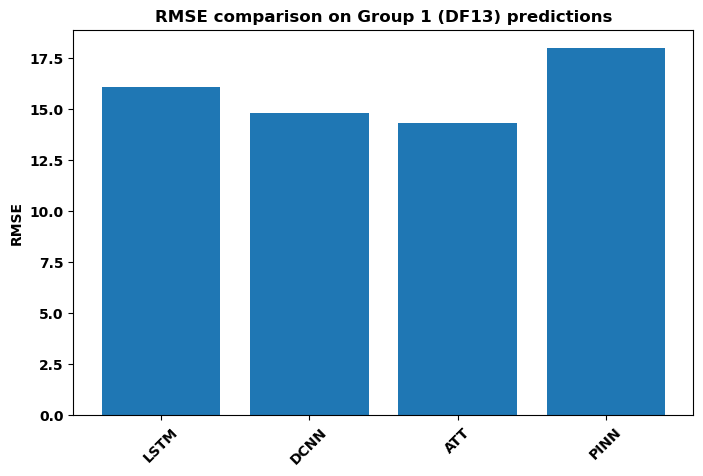

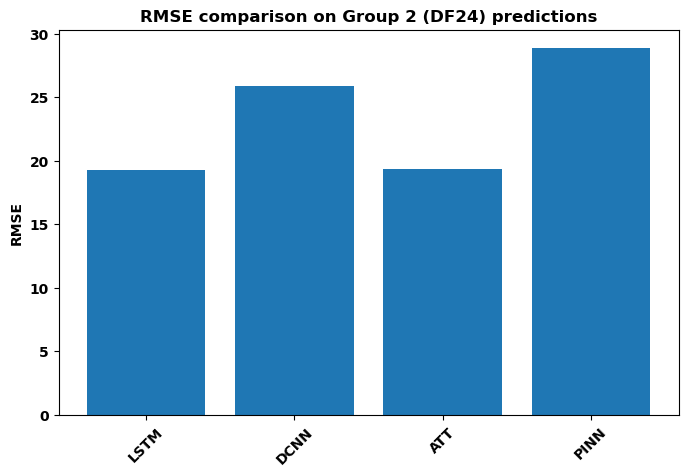

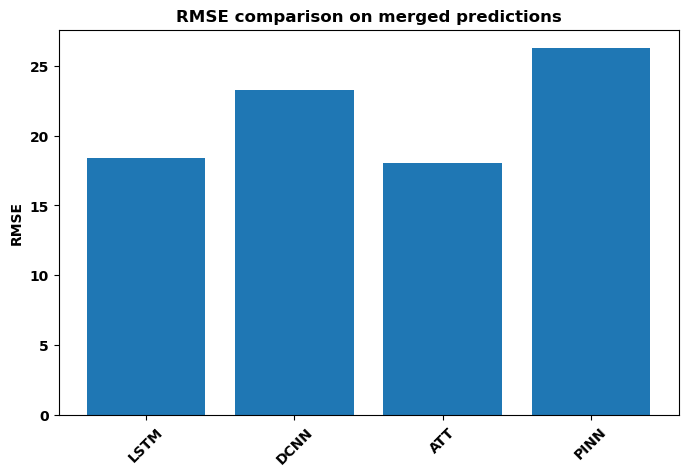

In [3]:
# Extract the RMSE values
rmse_13 = {model: all_model_results[model][f"{model}_13"]["rmse"] for model in all_model_results if f"{model}_13" in all_model_results[model]}
rmse_24 = {model: all_model_results[model][f"{model}_24"]["rmse"] for model in all_model_results if f"{model}_24" in all_model_results[model]}
rmse_all = {model: all_model_results[model][model]["rmse"] for model in all_model_results if model in all_model_results[model]}

# Function for creating a bar chart
def plot_rmse(data, title):
    plt.figure(figsize=(8, 5))
    plt.bar(data.keys(), data.values())
    plt.ylabel("RMSE")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Erstelle die Plots
plot_rmse(rmse_13, "RMSE comparison on Group 1 (DF13) predictions")
plot_rmse(rmse_24, "RMSE comparison on Group 2 (DF24) predictions")
plot_rmse(rmse_all, "RMSE comparison on merged predictions")


### Score Function

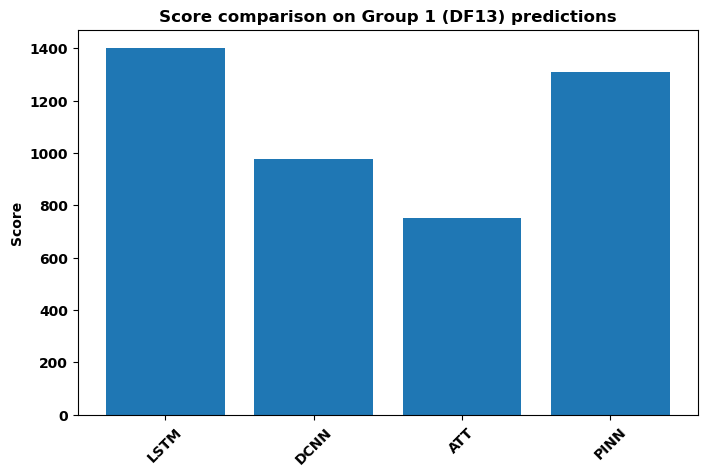

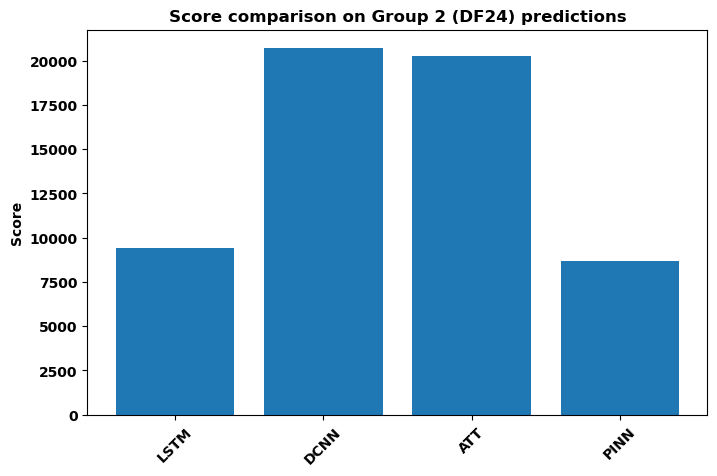

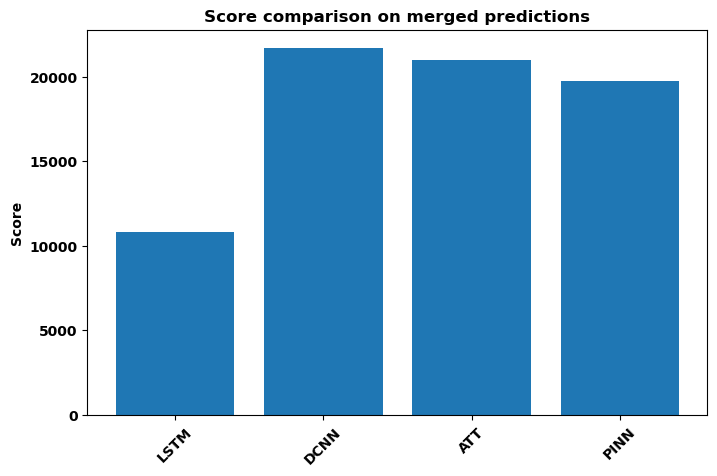

In [4]:
# Extract the RMSE values
score_13 = {model: all_model_results[model][f"{model}_13"]["score"] for model in all_model_results if f"{model}_13" in all_model_results[model]}
score_24 = {model: all_model_results[model][f"{model}_24"]["score"] for model in all_model_results if f"{model}_24" in all_model_results[model]}
score_all = {model: all_model_results[model][model]["score"] for model in all_model_results if model in all_model_results[model]}

# Function for creating a bar chart
def plot_rmse(data, title):
    plt.figure(figsize=(8, 5))
    plt.bar(data.keys(), data.values())
    plt.ylabel("Score")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Erstelle die Plots
plot_rmse(score_13, "Score comparison on Group 1 (DF13) predictions")
plot_rmse(score_24, "Score comparison on Group 2 (DF24) predictions")
plot_rmse(score_all, "Score comparison on merged predictions")


### F1-Score
With edge of RUL=100

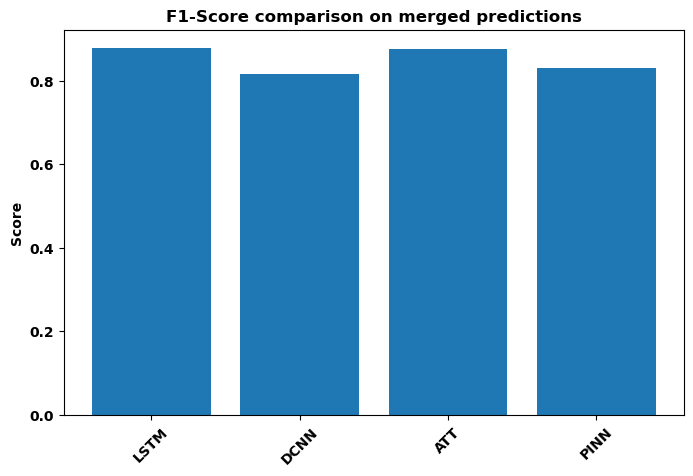

In [5]:
# Extract the RMSE values
f1_score_all = {model: all_model_results[model][model]["f1_score"] for model in all_model_results if model in all_model_results[model]}

# Function for creating a bar chart
def plot_rmse(data, title):
    plt.figure(figsize=(8, 5))
    plt.bar(data.keys(), data.values())
    plt.ylabel("Score")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Create the plots
plot_rmse(f1_score_all, "F1-Score comparison on merged predictions")


### Table over all metrics

In [6]:
table_data = []

# Extract metrics from all models
for model_name, model_dict in all_model_results.items():
    for variant, metrics in model_dict.items():
        score_value = metrics.get("score", "N/A")
        if isinstance(score_value, torch.Tensor):
            score_value = score_value.item()
        elif isinstance(score_value, np.ndarray):
            score_value = float(score_value)
        
        # Round values, if they are available
        rmse_value = metrics.get("rmse", "N/A")
        if isinstance(rmse_value, (int, float)):
            rmse_value = round(rmse_value, 3)
        
        if isinstance(score_value, (int, float)):
            score_value = round(score_value, 3)
        
        f1_score_value = metrics.get("f1_score", "N/A") if variant == model_name else "N/A"
        if isinstance(f1_score_value, (int, float)):
            f1_score_value = round(f1_score_value, 3)

        table_data.append([
            model_name, 
            variant, 
            rmse_value, 
            score_value,  
            f1_score_value
        ])

# Create a Pandas DataFrame
metrics_df = pd.DataFrame(table_data, columns=["Model", "Variant", "RMSE", "Score", "F1 Score"])

# Display the table
display(metrics_df)

,Model,Variant,RMSE,Score,F1 Score
0,LSTM,LSTM_13,16.045284,1401.156,N/A
1,LSTM,LSTM_24,19.237072,9419.647,N/A
2,LSTM,LSTM,18.390000,10820.806,0.879
3,DCNN,DCNN_13,14.785298,975.727,N/A
4,DCNN,DCNN_24,25.853222,20717.197,N/A
5,DCNN,DCNN,23.263000,21692.941,0.815
6,ATT,ATT_13,14.285113,751.669,N/A
7,ATT,ATT_24,19.317736,20245.803,N/A
8,ATT,ATT,18.037000,20997.478,0.876
9,PINN,PINN_13,17.973000,1309.908,N/A


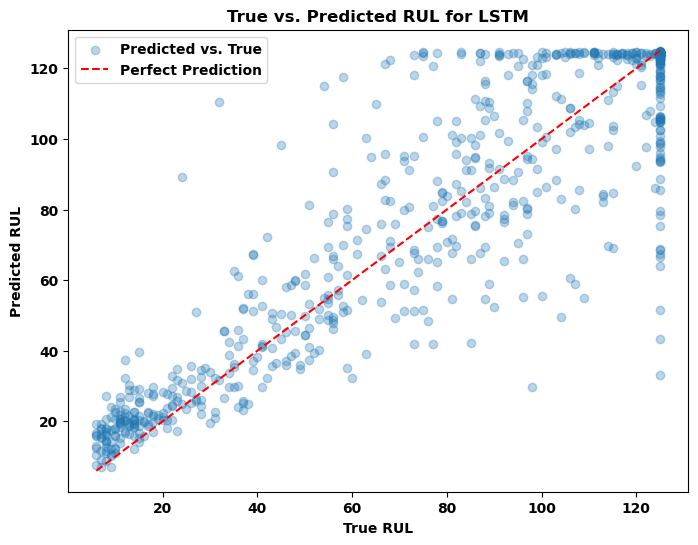

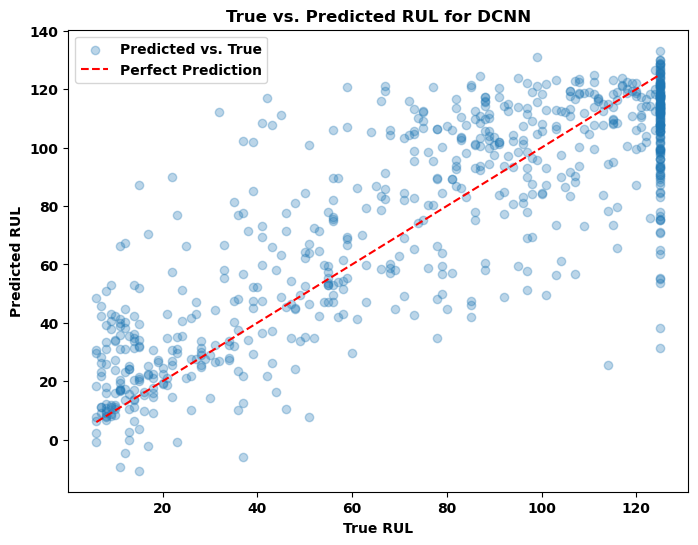

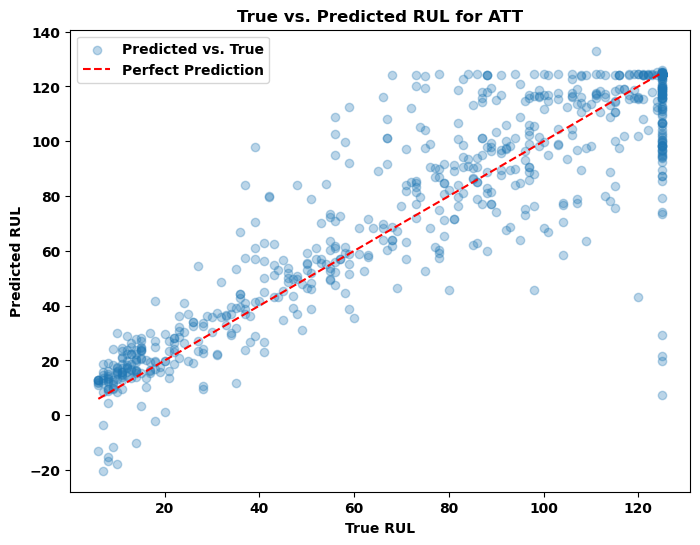

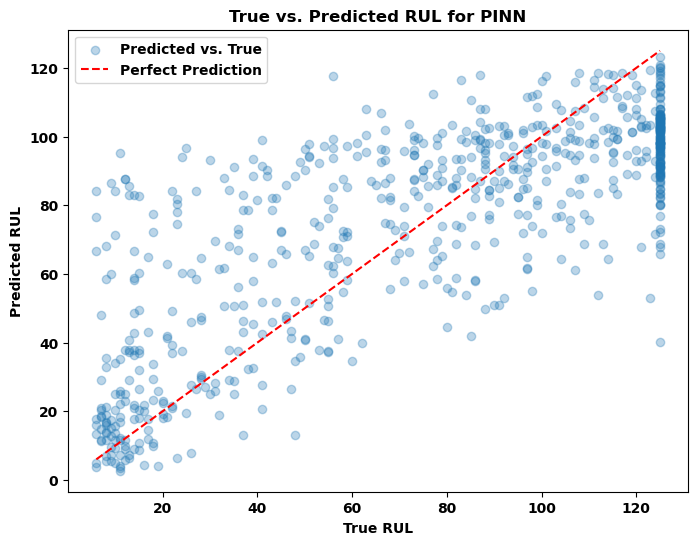

In [11]:
predictions_13 = {model: all_model_results[model][f"{model}_13"]["predictions"] for model in all_model_results if f"{model}_13" in all_model_results[model]}
predictions_24 = {model: all_model_results[model][f"{model}_24"]["predictions"] for model in all_model_results if f"{model}_24" in all_model_results[model]}
predictions_all = {model: all_model_results[model][model]["predictions"] for model in all_model_results if model in all_model_results[model]}
labels_13 = {model: all_model_results[model][f"{model}_13"]["labels"] for model in all_model_results if f"{model}_13" in all_model_results[model]}
labels_24 = {model: all_model_results[model][f"{model}_24"]["labels"] for model in all_model_results if f"{model}_24" in all_model_results[model]}
labels_all = {model: all_model_results[model][model]["labels"] for model in all_model_results if model in all_model_results[model]}

def plot_scatter_rul(true_rul, predicted_rul, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(true_rul, predicted_rul, alpha=0.3, label="Predicted vs. True")
    plt.plot([min(true_rul), max(true_rul)], [min(true_rul), max(true_rul)], 'r--', label="Perfect Prediction")
    plt.xlabel("True RUL")
    plt.ylabel("Predicted RUL")
    plt.title(f"True vs. Predicted RUL for {model_name}")
    plt.legend()
    plt.show()

plot_scatter_rul(labels_all['LSTM'], predictions_all['LSTM'], "LSTM")
plot_scatter_rul(labels_all['DCNN'], predictions_all['DCNN'], "DCNN")
plot_scatter_rul(labels_all['ATT'], predictions_all['ATT'], "ATT")
plot_scatter_rul(labels_all['PINN'], predictions_all['PINN'], "PINN")

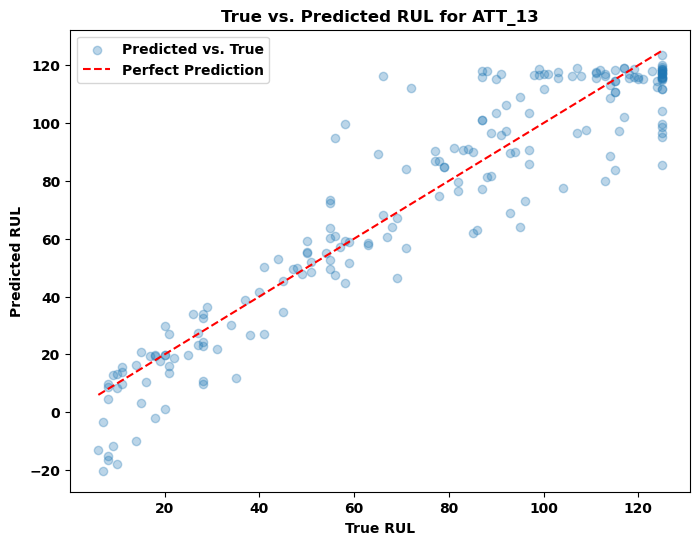

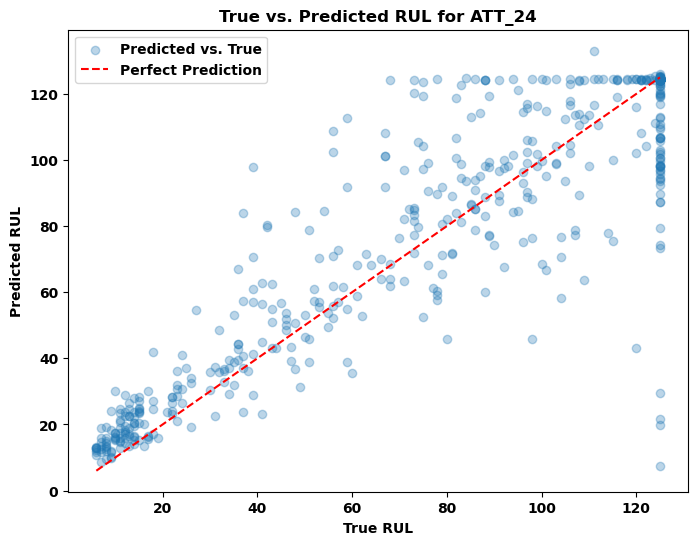

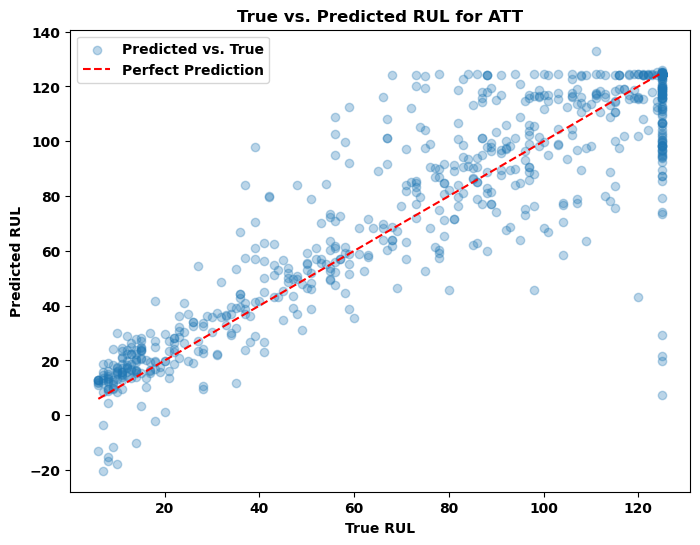

In [12]:
plot_scatter_rul(all_model_results["ATT"]["ATT_13"]["labels"], all_model_results["ATT"]["ATT_13"]["predictions"], "ATT_13")
plot_scatter_rul(all_model_results["ATT"]["ATT_24"]["labels"], all_model_results["ATT"]["ATT_24"]["predictions"], "ATT_24")
plot_scatter_rul(labels_all['ATT'], predictions_all['ATT'], "ATT")